# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import spacy
import re
import json

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from collections import Counter

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('clean_tweet.csv')
df.tail()

,sentimen,tweet,remove_unrelevant_emoji,emojis,tweet_clean,tweet_proc_punct,tweet_no_punct,tweet_no_sc,tweet_lowercase,tweet_no_slang,tweet_no_sw,tweet_no_number,tweet_no_extra_spaces,tweet_lem,final_tweet,tweet_tokenization
1810,netral,Negarawan sejati sll ...,Negarawan sejati sll ...,NaN,Negarawan sejati sll ...,Negarawan sejati sll ...,Negarawan sejati sll ...,Negarawan sejati sll ...,negarawan sejati sll ...,negarawan sejati sela...,negarawan sejati bang...,negarawan sejati bang...,negarawan sejati bang...,negarawan sejati bang...,negarawan sejati bang...,"['negarawan', 'sejati..."
1811,netral,1. HRS ceramah di Dam...,1. HRS ceramah di Dam...,NaN,1. HRS ceramah di Dam...,1. HRS ceramah di Dam...,1 HRS ceramah di Dam...,1 HRS ceramah di Dam...,1 hrs ceramah di dam...,1 harus ceramah di d...,1 ceramah damai indon...,1 ceramah damai indon...,1 ceramah damai indon...,1 ceramah damai indon...,1 ceramah damai indon...,"['1', 'ceramah', 'dam..."
1812,netral,Mari bangun bangsa dg...,Mari bangun bangsa dg...,NaN,Mari bangun bangsa dg...,Mari bangun bangsa dg...,Mari bangun bangsa dg...,Mari bangun bangsa dg...,mari bangun bangsa dg...,mari bangun bangsa de...,mari bangun bangsa me...,mari bangun bangsa me...,mari bangun bangsa me...,mari bangun bangsa du...,mari bangun bangsa du...,"['mari', 'bangun', 'b..."
1813,netral,Bantu majukan perekon...,Bantu majukan perekon...,NaN,Bantu majukan perekon...,Bantu majukan perekon...,Bantu majukan perekon...,Bantu majukan perekon...,bantu majukan perekon...,bantu majukan perekon...,bantu majukan perekon...,bantu majukan perekon...,bantu majukan perekon...,bantu maju ekonomi ba...,bantu maju ekonomi ba...,"['bantu', 'maju', 'ek..."
1814,netral,Pak @jokowi mengubah ...,Pak @jokowi mengubah ...,NaN,Pak jokowi mengubah c...,Pak jokowi mengubah c...,Pak jokowi mengubah c...,Pak jokowi mengubah c...,pak jokowi mengubah c...,pak jokowi mengubah c...,jokowi mengubah panda...,jokowi mengubah panda...,jokowi mengubah panda...,jokowi ubah pandang e...,jokowi ubah pandang e...,"['jokowi', 'ubah', 'p..."


# EDA

In [3]:
# Calculate the length of each text and create a new column
df['text_length'] = df['tweet'].apply(len)
df['final_text_length'] = df['final_tweet'].apply(len)

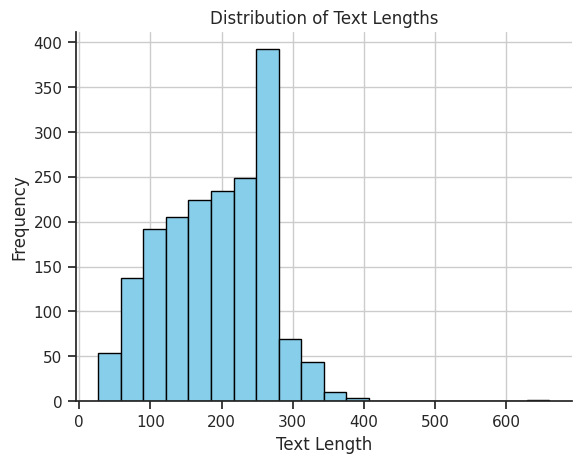

In [4]:
# Plot a histogram of text lengths
plt.hist(df['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

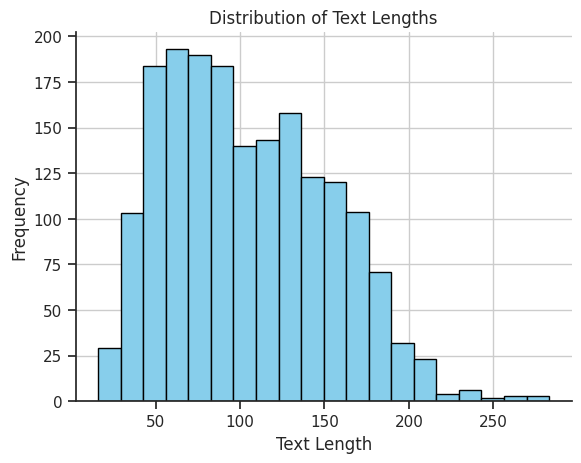

In [5]:
# Plot a histogram of text lengths
plt.hist(df['final_text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
df['text_length'].median() # Let's take 198 as our max_len for BASE MODEL

198.0

In [7]:
df['final_text_length'].median() # Let's take 98 as our max_len

98.0

In [8]:
# Tokenize text into words
words = ' '.join(df.tweet.values).split()

# Count occurrences of each unique word
word_counts = Counter(words)

# Calculate the total number of unique words
total_unique_vocabs = len(word_counts)

print("Total unique vocabularies:", total_unique_vocabs) # 12631 as our max_words

Total unique vocabularies: 12613


In [9]:
# Tokenize text into words
words = ' '.join(df.final_tweet.values).split()

# Count occurrences of each unique word
word_counts = Counter(words)

# Calculate the total number of unique words
final_total_unique_vocabs = len(word_counts)

print("Final Total unique vocabularies:", final_total_unique_vocabs) # 4170 as our max_words

Final Total unique vocabularies: 4170


In [18]:
for i in df.index:
  print(df.loc[i, 'sentimen'])
  print(df.loc[i, 'final_tweet'])
  print()

Output streaming akan dipotong hingga 5000 baris terakhir.
penting prabowo sandiaga komitmen turun harga listrik gue dukung jokowi tidak setuju dukung prabowo sandiaga setuju moga prabowo pimpin tepat janji kampanye tidak jokowi 

netral
jokowi warga papua hak rasa harga bahan bakar minyak pulau jawa 

netral
skill anak bangsa harga negara april tusuk prabowo sandiaga ✔

netral
jalan tol trans sumatra bukan lanjut jokowi ekonomi kembang tahun ekonomi negara tidak kembang minus rupiah stabil zaman susilo bambang yudhoyono inflasi negara 

netral
impact negara gamers fasilitas bisa negara mandang gamers indonesia hebat bisa diadain selenggara game internasional indonesia impact sponsor kunjung wisatawan tingkat ekonomi bisa maju 

netral
subsidi sasar baik setuju bicara daya beli masyarakat lemah sau topik ekonomi bahas tidak setuju 

netral
bisa psimis orang cinta game bisa developer game serap tenage kerja iya game bisa jual printilan2 dibutuhin diamond mobilegend bangun pelan pelan bu

# BASE MODEL

## Data Splitting

In [11]:
X = df.tweet

# one hot label encoding for every class probability,  uncomment below if you wanted to use this
label_encoder = OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error
)
Y = df[['sentimen']]
Y = label_encoder.fit_transform(Y)
Y = Y.toarray() # convert to array data type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Convert text to sequence
max_words = total_unique_vocabs
max_len = int(df['text_length'].median())

## Assign an index for every words
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)

## Make the length of every text the same by assign it 0
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

NameError: name 'total_unique_vocabs' is not defined

In [ ]:
X_full_train, X_test, y_full_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_valid, y_train, y_valid = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42, stratify=y_full_train)

## Modelling

In [ ]:
# define RNN for one hot label encoder, uncomment is you wanted to use this
def model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, verbose=1)
es = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="min", restore_best_weights=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 198, 64)           807232    
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 840451 (3.21 MB)
Trainable params: 840451 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [ ]:
EPOCH = 50
BATCH_SIZE = 32

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), callbacks=[lr,es])

# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print("Validation Accuracy:", accuracy)

Epoch 1/50
35/35 [==============================] - 10s 171ms/step - loss: 1.0921 - accuracy: 0.3921 - val_loss: 1.0679 - val_accuracy: 0.4490 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 5s 146ms/step - loss: 0.9620 - accuracy: 0.6667 - val_loss: 0.9859 - val_accuracy: 0.4959 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 5s 148ms/step - loss: 0.6443 - accuracy: 0.7438 - val_loss: 0.9470 - val_accuracy: 0.5813 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 4s 120ms/step - loss: 0.3437 - accuracy: 0.9100 - val_loss: 1.0753 - val_accuracy: 0.5895 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 5s 157ms/step - loss: 0.1940 - accuracy: 0.9513 - val_loss: 1.1612 - val_accuracy: 0.5840 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 5s 131ms/step - loss: 0.1021 - accuracy: 0.9734 - val_loss: 1.2863 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - 5s 154ms/step - l

## Evaluation

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

12/12 [==============================] - 0s 31ms/step - loss: 0.9276 - accuracy: 0.5785
Test Accuracy: 0.5785123705863953


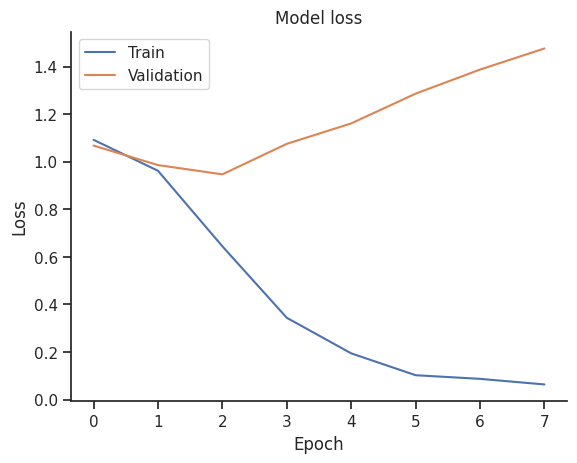

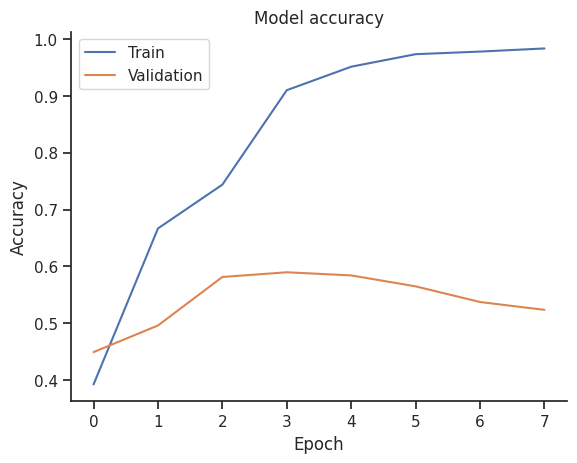

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# MAIN MODEL

## Data Splitting

In [10]:
X = df.final_tweet

# one hot label encoding for every class probability,  uncomment below if you wanted to use this
label_encoder = OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error
)
Y = df[['sentimen']]
Y = label_encoder.fit_transform(Y)
Y = Y.toarray() # convert to array data type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Get the categories
categories = label_encoder.categories_[0]  # Assuming Y is one-dimensional

# Print categories and their corresponding integer labels
for i, category in enumerate(categories):
    print(f"Label {i}: {category}")

Label 0: negatif
Label 1: netral
Label 2: positif


In [12]:
# Convert text to sequence
max_words = final_total_unique_vocabs
max_len = int(df['final_text_length'].median())

## Assign an index for every words
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)

## Make the length of every text the same by assign it 0
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [13]:
X_full_train, X_test, y_full_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_valid, y_train, y_valid = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42, stratify=y_full_train)

## Modelling

In [14]:
# define RNN for one hot label encoder, uncomment is you wanted to use this
def model():
    model = Sequential()
    model.add(Embedding(max_words, 64, input_length=max_len))
    model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model = model()
model.summary()

lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, verbose=1)
es = EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min", restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 98, 64)            266880    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 300099 (1.14 MB)
Trainable params: 300099 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [16]:
EPOCH = 50
BATCH_SIZE = 32

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), callbacks=[lr,es])

# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print("Validation Accuracy:", accuracy)

Epoch 1/50
35/35 [==============================] - 10s 176ms/step - loss: 1.0916 - accuracy: 0.3646 - val_loss: 1.0677 - val_accuracy: 0.4793 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 5s 134ms/step - loss: 1.0254 - accuracy: 0.5363 - val_loss: 1.0763 - val_accuracy: 0.4821 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 6s 167ms/step - loss: 0.8903 - accuracy: 0.6492 - val_loss: 0.9796 - val_accuracy: 0.5234 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 5s 134ms/step - loss: 0.6329 - accuracy: 0.7695 - val_loss: 1.0079 - val_accuracy: 0.5565 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 6s 167ms/step - loss: 0.4243 - accuracy: 0.8522 - val_loss: 1.1191 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 5s 135ms/step - loss: 0.2710 - accuracy: 0.9164 - val_loss: 1.3735 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - 5s 132ms/step - l

## Evaluation

In [17]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

12/12 [==============================] - 0s 21ms/step - loss: 0.9504 - accuracy: 0.5868
Test Accuracy: 0.586776852607727


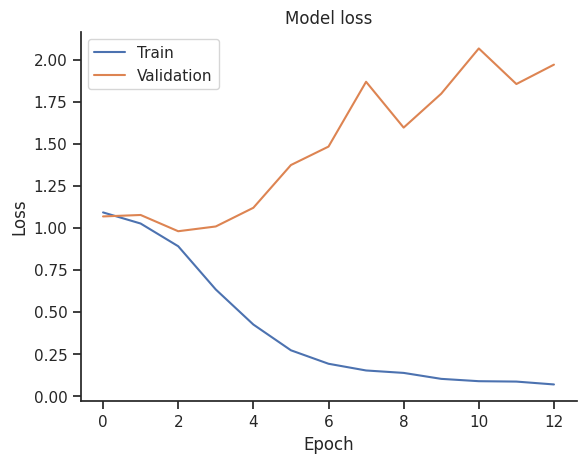

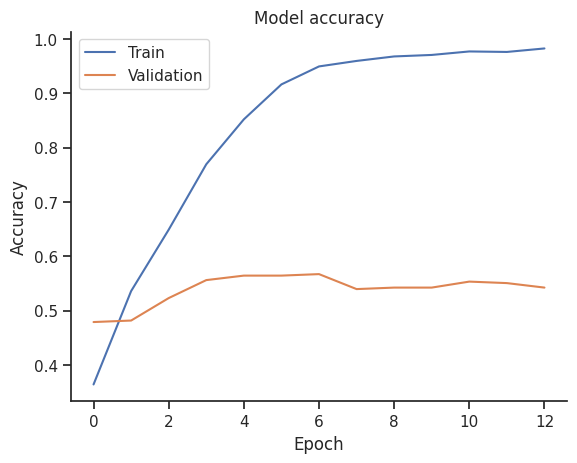

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
# Coba L1 & L2 Regularization
# Pemahaman Masalah

# Lihat Secara Kualitatif terkait hasilnya
## Kalau bagus, bagusnya kenapa
## Kalau jelek, jeleknya kenapa

# Ganti Embeddings Layer dengan Input Layer (Word2Vec, SkipGram, CBOW)
# Model() --> Ambil Threshold (Cek di grup) # y_pred > 0.5

# Alasan kenapa make itu dan Dampaknya bagaimana

In [20]:
# one hot label encoding for every class probability,  uncomment below if you wanted to use this
label_encoder = OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error
)
Y = df[['sentimen']]
Y = label_encoder.fit_transform(Y)
Y = Y.toarray() # convert to array data type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
df[['sentimen']].values

array([['negatif'],
       ['netral'],
       ['netral'],
       ...,
       ['netral'],
       ['netral'],
       ['netral']], dtype=object)

In [22]:
X_full_train_original, X_test_original, y_full_train_original, y_test_original = train_test_split(df, df.sentimen, test_size=0.2, random_state=42, stratify=df.sentimen)
X_test_original = X_test_original.reset_index()[['sentimen', 'tweet', 'final_tweet']]

label_classes = {0: 'negatif', 1: 'netral', 2: 'positif'}

In [23]:
y_pred_classes = np.argmax(y_pred, axis=1)
X_test_original['predictions'] = y_pred_classes
X_test_original['predictions'] = X_test_original['predictions'].map(label_classes)

In [24]:
label_encoder = OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error
)

y_predsss = label_encoder.fit_transform(X_test_original[['predictions']])
y_predsss = y_predsss.toarray() # convert to array data type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
y_pred_classes.shape

(363,)

In [26]:
# Identify misclassifications
misclassified_indices = np.where(y_predsss != y_test)[0]

# Extract misclassified samples and their probabilities
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred_classes[misclassified_indices]
misclassified_probabilities = y_pred[misclassified_indices]

# Display misclassified samples, true labels, predicted labels, and probabilities
for i in range(len(misclassified_indices)):
    print("Sample:", misclassified_samples[i])
    print("True Label:", misclassified_true_labels[i])
    print("Predicted Label:", misclassified_predicted_labels[i])
    print("Probabilities:", misclassified_probabilities[i])
    print("-----------")

    break

Sample: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  191  107  184  548 2331  401 2332   70  692 1112    2]
True Label: [0. 1. 0.]
Predicted Label: 0
Probabilities: [0.53185636 0.15291543 0.31522822]
-----------


In [27]:
misclassified_indices = np.where(y_predsss != y_test)[0]
X_test_original['sentimen_prediction'] = list(y_pred)

In [28]:
X_test_original['sentimen_predictions'] = y_pred_classes
X_test_original['sentimen_predictions'] = X_test_original['sentimen_predictions'].map(label_classes)

In [29]:
X_test_original.head()

,sentimen,tweet,final_tweet,predictions,sentimen_prediction,sentimen_predictions
0,netral,"Pak @jokowi, mohon bi...",jokowi mohon bilang p...,netral,"[0.14797387, 0.576805...",netral
1,negatif,"Eh bung, tolong bedak...",tolong bedak startup ...,positif,"[0.20413099, 0.365796...",positif
2,netral,Rizal Ramli: Ekonomi ...,rizal ramli ekonomi i...,negatif,"[0.53185636, 0.152915...",negatif
3,positif,"Senang,gembira lihat ...",senang gembira lihat ...,netral,"[0.114008375, 0.72166...",netral
4,netral,Demokrat Minta Prabow...,demokrat prabowo harg...,negatif,"[0.5991182, 0.0795240...",negatif


In [30]:
misclassify_X_test = X_test_original.loc[(X_test_original.sentimen != X_test_original.sentimen_predictions)]
correctly_misclassify_X_test = X_test_original.loc[(X_test_original.sentimen == X_test_original.sentimen_predictions)]

In [31]:
X_test.shape

(363, 98)

In [32]:
misclassify_X_test.shape, correctly_misclassify_X_test.shape

((240, 6), (123, 6))

In [33]:
for i in misclassify_X_test.sample(n=25).index:
  print('Original Tweet:',misclassify_X_test.loc[i, 'tweet'])
  print('Final Tweet:',misclassify_X_test.loc[i, 'final_tweet'])
  print('y_test:',misclassify_X_test.loc[i, 'sentimen'])
  print('y_pred:',misclassify_X_test.loc[i, 'sentimen_predictions'])
  print('y_pred:',misclassify_X_test.loc[i, 'sentimen_prediction'])
  print()

Original Tweet: Terharu baca reply nya betapa dihargai dan diapresiasinya pak jokowi sama orang luar
Final Tweet: haru baca reply betapa harga apresiasi jokowi orang 
y_test: positif
y_pred: negatif
y_pred: [0.59442455 0.03783979 0.36773568]

Original Tweet: Pak Prabowo aja bilang kehancuran ekonomi gara2 pemimpin terdahulu. Ya hitung aja proporsional masing2 pemimpin terdahulu berkuasa berapa lama? 80% ya orde baru. Sekarang lu minta order baru lagi yg mimpin? Sehat kaw bambanggg?
Final Tweet: prabowo bilang hancur ekonomi gara gara pimpin hitung proporsional pimpin kuasa orde order pimpin sehat kau bambanggg 
y_test: negatif
y_pred: positif
y_pred: [0.13787407 0.37777972 0.4843462 ]

Original Tweet: Pak @sandiuno dan pak @prabowo Gajinya kirim ke saya sj.  https://twitter.com/detikcom/status/1117096753759686657👍
Final Tweet: sandiaga prabowo gaji kirim 
y_test: netral
y_pred: negatif
y_pred: [0.43803063 0.20920146 0.35276785]

Original Tweet: Satu lagi ka , prabowo selalu bilang raky

In [34]:
for i in correctly_misclassify_X_test.sample(n=25).index:
  print('Original Tweet:',correctly_misclassify_X_test.loc[i, 'tweet'])
  print('Final Tweet:',correctly_misclassify_X_test.loc[i, 'final_tweet'])
  print('y_test:',correctly_misclassify_X_test.loc[i, 'sentimen'])
  print('y_pred:',correctly_misclassify_X_test.loc[i, 'sentimen_predictions'])
  print('y_pred:',correctly_misclassify_X_test.loc[i, 'sentimen_prediction'])
  print()

Original Tweet: Ini yang tak akan bisa dilakukan oleh Jokowi - Maruf. Mereka belum selesai dengan urusan materi.  Prabowo-Sandi Tak Akan Ambil Gaji Sepeser Pun Jika Terpilih   https://m.kumparan.com/amp/@kumparannews/prabowo-sandi-tak-akan-ambil-gaji-sepeser-pun-jika-terpilih-1qsh5p8Xjqe?__twitter_impression=true👍
Final Tweet: tidak bisa jokowi maruf belum selesai urus materi prabowo sandiaga tidak ambil gaji peser pilih 
y_test: netral
y_pred: netral
y_pred: [0.24177396 0.5267053  0.23152065]

Original Tweet: Sangat disesalkan pak @jokowi  & Kyai Ma'ruf  berdebat dg Dirut & Komisaris yg msh ingin mempertahankan posisinya. Debat menjadi tdk imbang krn penantang msh berorientasi ke pengelolaan persh dan bukan ekonomi sbh negara.
Final Tweet: sesal jokowi kiai maruf debat direktur utama komisaris tahan posisi debat tidak imbang tantang orientasi kelola persh bukan ekonomi negara 
y_test: negatif
y_pred: negatif
y_pred: [0.70686936 0.00982303 0.28330755]

Original Tweet: Tidak hanya utk k

In [35]:
## prabowo
## jokowi
## sandiaga
## ekonomi
## gaji

In [36]:
X_test_original.head()

,sentimen,tweet,final_tweet,predictions,sentimen_prediction,sentimen_predictions
0,netral,"Pak @jokowi, mohon bi...",jokowi mohon bilang p...,netral,"[0.14797387, 0.576805...",netral
1,negatif,"Eh bung, tolong bedak...",tolong bedak startup ...,positif,"[0.20413099, 0.365796...",positif
2,netral,Rizal Ramli: Ekonomi ...,rizal ramli ekonomi i...,negatif,"[0.53185636, 0.152915...",negatif
3,positif,"Senang,gembira lihat ...",senang gembira lihat ...,netral,"[0.114008375, 0.72166...",netral
4,netral,Demokrat Minta Prabow...,demokrat prabowo harg...,negatif,"[0.5991182, 0.0795240...",negatif


In [50]:
cek_kata = ['prabowo', 'jokowi', 'sandiaga', 'ekonomi', 'gaji', 'presiden', 'indonesia', 'harga', 'negara', 'rakyat']
index_isi = list()
kata_ = list()
for idx in X_test_original.index:
  temp_kata = list()
  for kata in cek_kata:
    if kata in X_test_original.loc[idx, 'final_tweet']:
      index_isi.append(idx)
      temp_kata.append(kata)
  kata_.append(temp_kata)

In [51]:
X_test_original['kata_penting'] = kata_

In [52]:
X_test_original.kata_penting.value_counts()

[jokowi, ekonomi]                                            46
[prabowo, sandiaga, gaji]                                    27
[ekonomi]                                                    20
[jokowi, harga]                                              17
[prabowo, sandiaga, gaji, presiden]                          11
[harga]                                                      11
[prabowo, jokowi, ekonomi, presiden, indonesia]              10
[gaji]                                                        9
[jokowi, ekonomi, presiden]                                   9
[prabowo, ekonomi]                                            8
[jokowi, gaji]                                                7
[prabowo, jokowi, sandiaga, ekonomi]                          7
[prabowo, sandiaga, harga]                                    7
[prabowo, jokowi, ekonomi]                                    7
[prabowo, ekonomi, indonesia]                                 7
[prabowo, harga]                        

In [53]:
# Expand the lists in the second column into a single string
expanded_df = X_test_original['kata_penting'].apply(lambda x: ", ".join(x))

X_test_original['kata_penting'] = expanded_df.values

In [54]:
misclassify_X_test = X_test_original.loc[(X_test_original.sentimen != X_test_original.sentimen_predictions)]
correctly_misclassify_X_test = X_test_original.loc[(X_test_original.sentimen == X_test_original.sentimen_predictions)]

In [55]:
misclassify_ct = pd.crosstab(misclassify_X_test['kata_penting'], misclassify_X_test['sentimen'], margins=True)
correctly_misclassify_ct = pd.crosstab(correctly_misclassify_X_test['kata_penting'], correctly_misclassify_X_test['sentimen_predictions'], margins=True)

In [56]:
misclassify_X_test.shape

(240, 7)

In [57]:
misclassify_ct

sentimen,negatif,netral,positif,All
kata_penting,,,,
,1,0,1,2
ekonomi,6,1,3,10
"ekonomi, indonesia",1,0,0,1
"ekonomi, negara",0,1,0,1
"ekonomi, presiden, indonesia",0,0,1,1
"ekonomi, presiden, rakyat",0,0,1,1
"ekonomi, rakyat",0,0,1,1
gaji,4,1,1,6
"gaji, presiden, rakyat",0,0,1,1


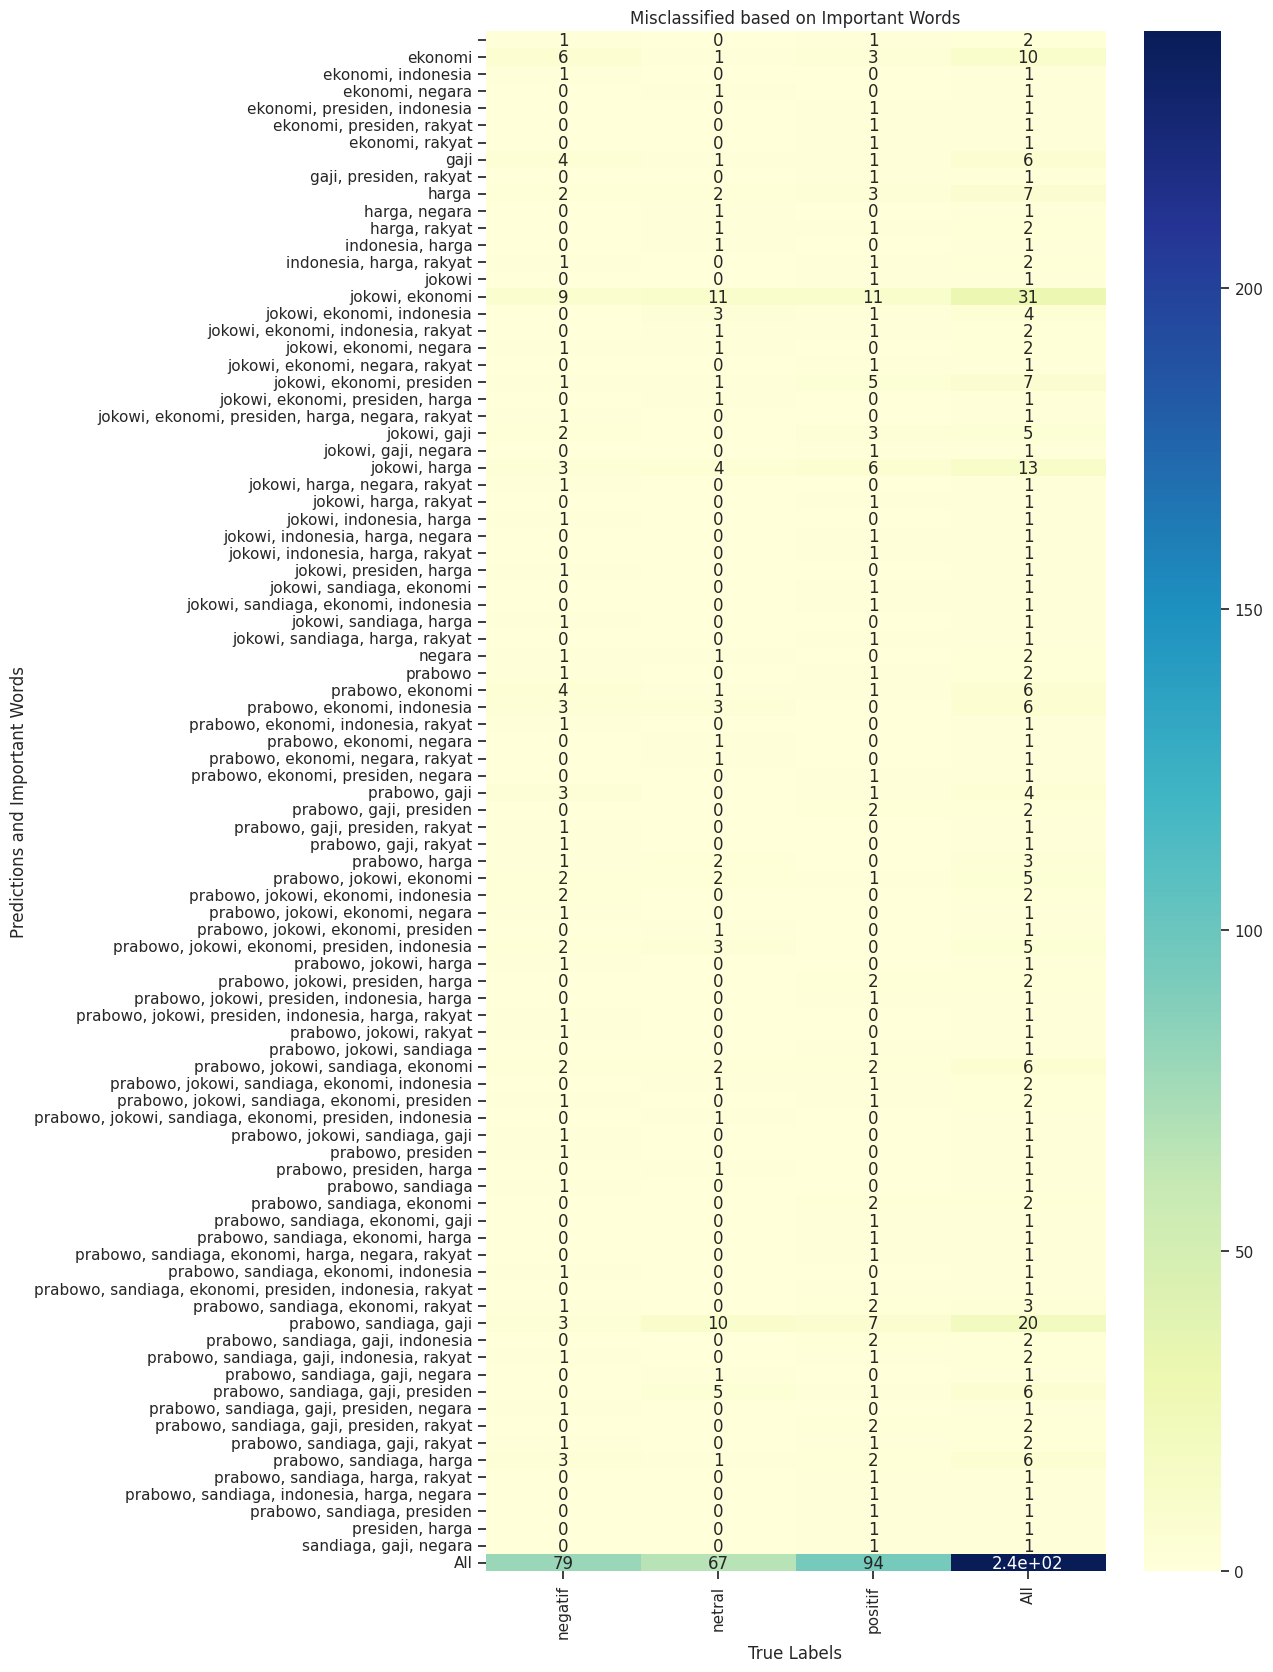

In [61]:
# Plot heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(misclassify_ct, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Misclassified based on Important Words')
plt.xlabel('True Labels')
plt.ylabel('Predictions and Important Words')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

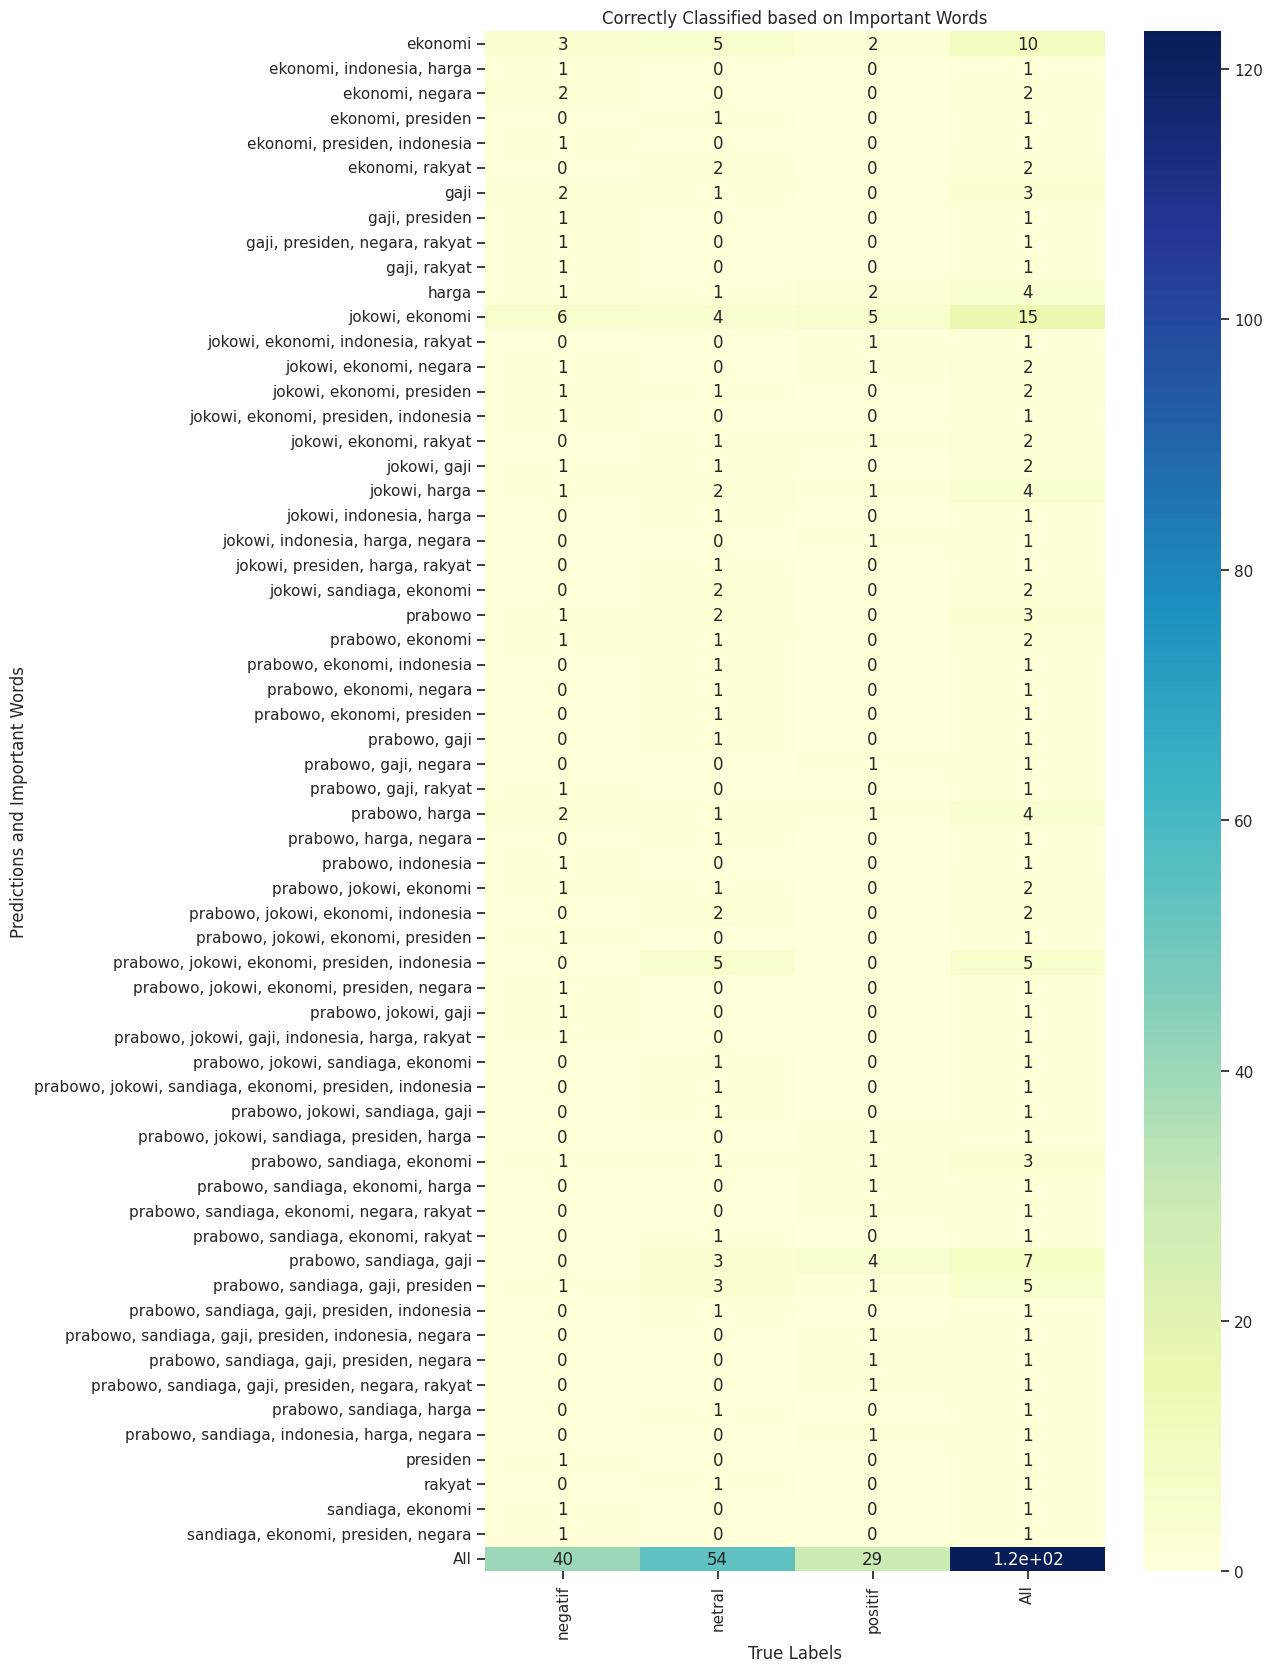

In [62]:
# Plot heatmap
plt.figure(figsize=(10, 20))
sns.heatmap(correctly_misclassify_ct, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Correctly Classified based on Important Words')
plt.xlabel('True Labels')
plt.ylabel('Predictions and Important Words')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [123]:
misclassify_ct_3d = pd.crosstab(misclassify_X_test['sentimen'], misclassify_X_test['kata_penting'], misclassify_X_test['sentimen'], aggfunc=len)

In [67]:
list_ = ['jokowi, ekonomi', 'prabowo, sandiaga, gaji', 'ekonomi', 'jokowi, harga']

In [71]:
most_error = misclassify_X_test.loc[misclassify_X_test.kata_penting.isin(list_),:]

for i in most_error.index:
  print('Original Tweet:',most_error.loc[i, 'tweet'])
  print('Final Tweet:',most_error.loc[i, 'final_tweet'])
  print('y_test:',most_error.loc[i, 'sentimen'])
  print('y_pred:',most_error.loc[i, 'sentimen_predictions'])
  print('y_pred:',most_error.loc[i, 'sentimen_prediction'])
  print('Kata Penting:',most_error.loc[i, 'kata_penting'])

  print()

Original Tweet: Eh bung, tolong bedakan startup sebagai monetizing dan hobi yg di monetize, startup jelas ada nilai keekonomian yg besar, tapi hobi? Hanya segelintir orang yg melakukannya, dan bukan kebutuhan. Ya Allah masa harus saya jelaskan seh bedanya panjang lebar bung...
Final Tweet: tolong bedak startup monetizing hobi monetize startup nilai ekonomi hobi gelintir orang laku bukan butuh allah beda lebar 
y_test: negatif
y_pred: positif
y_pred: [0.20413099 0.3657965  0.43007246]
Kata Penting: ekonomi

Original Tweet: Prabowo dan Sandi komit gajinya tidak akan diambil serupiahpun mantap Allahu Akbar
Final Tweet: prabowo sandiaga komitmen gaji tidak ambil rupiah mantap allahu akbar 
y_test: positif
y_pred: negatif
y_pred: [0.414648   0.35790116 0.22745094]
Kata Penting: prabowo, sandiaga, gaji

Original Tweet: Asli ngakak... Kalau pak jokowi tanya ekonomi digital #JokowiMenangTotalDebat
Final Tweet: asli tertawa jokowi ekonomi digital 
y_test: positif
y_pred: netral
y_pred: [0.14252

# Feature Engineering with EMBEDDINGS

In [ ]:
X = df.final_tweet

# one hot label encoding for every class probability,  uncomment below if you wanted to use this
label_encoder = OneHotEncoder(
    categories='auto',  # Categories per feature
    drop=None, # Whether to drop one of the features
    sparse=True, # Will return sparse matrix if set True
    handle_unknown='error' # Whether to raise an error
)
Y = df[['sentimen']]
Y = label_encoder.fit_transform(Y)
Y = Y.toarray() # convert to array data type

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Convert text to sequence
max_words = final_total_unique_vocabs
max_len = int(df['final_text_length'].median())

## Assign an index for every words
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)

## Make the length of every text the same by assign it 0
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [ ]:
X_full_train, X_test, y_full_train, y_test = train_test_split(sequences_matrix, Y, test_size=0.2, random_state=42, stratify=Y)
X_train, X_valid, y_train, y_valid = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42, stratify=y_full_train)

In [ ]:
EPOCH = 10
BATCH_SIZE = 32

In [ ]:
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(units=64),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE)

# Extract embeddings
embeddings = model.predict(X_train)

# Flatten embeddings
flattened_embeddings_train = embeddings.reshape(len(X_train), -1)

Epoch 1/10
35/35 [==============================] - 6s 94ms/step - loss: 1.0842 - accuracy: 0.3985
Epoch 2/10
35/35 [==============================] - 2s 65ms/step - loss: 0.9983 - accuracy: 0.5124
Epoch 3/10
35/35 [==============================] - 2s 59ms/step - loss: 0.7243 - accuracy: 0.7080
Epoch 4/10
35/35 [==============================] - 2s 59ms/step - loss: 0.4594 - accuracy: 0.8310
Epoch 5/10
35/35 [==============================] - 2s 59ms/step - loss: 0.3186 - accuracy: 0.9045
Epoch 6/10
35/35 [==============================] - 2s 70ms/step - loss: 0.2007 - accuracy: 0.9412
Epoch 7/10
35/35 [==============================] - 2s 71ms/step - loss: 0.1307 - accuracy: 0.9633
Epoch 8/10
35/35 [==============================] - 2s 60ms/step - loss: 0.0972 - accuracy: 0.9725
Epoch 9/10
35/35 [==============================] - 2s 60ms/step - loss: 0.0837 - accuracy: 0.9752
Epoch 10/10
35/35 [==============================] - 1s 15ms/step


In [ ]:
# Train logistic regression model using embeddings from training set
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(embeddings, np.argmax(y_train,axis=1))

LogisticRegression(multi_class='multinomial')

In [ ]:
# Extract embeddings from testing set
embeddings_test = model.predict(X_test)

# Evaluate the trained logistic regression model on the testing set
accuracy = log_reg.score(embeddings_test, np.argmax(y_test, axis=1))
print("Accuracy:", accuracy)

12/12 [==============================] - 0s 17ms/step
Accuracy: 0.5564738292011019
